In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf

from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Bidirectional
from keras.layers import LSTM, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split
from keras import optimizers

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [189]:
names =  pd.read_csv('taylor_swift.csv', error_bad_lines = False, encoding='latin-1')

In [190]:
names.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [191]:
names = names.drop(['artist','album','track_title','track_n','line','year'], axis=1)

In [192]:
len(names)

4862

In [200]:
data = []
for i in range(len(names)):
    x = names.iloc[i][0].split()
    if len(x) > 8:
        x = x[:8]
    elif len(x) < 8:
        while(len(x) != 8):
            x.append('9')
    for k in range(8):
        x[k] = x[k].translate(str.maketrans('', '', string.punctuation))
    data.append(x)

In [201]:
vocab = set(x for l in data for x in l)

In [202]:
len(vocab)

2668

In [203]:
vocabulary = list(vocab)
vocabulary = np.array(vocabulary)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(vocabulary)

In [204]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\Vee\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [205]:
big_data = []
bigger_data = []
for x in range(len(data)):
    for y in range(8):
        big_data.append(onehot_encoded[np.where(vocabulary == data[x][y])[0][0]])
    bigger_data.append(big_data)
    big_data = []

In [206]:
bigger_data = np.array(bigger_data)

In [207]:
bigger_data.shape

(4862, 8, 2668)

In [208]:
ans = []
for i in range(bigger_data.shape[0]):
    ans.append(np.random.normal(1,10,(3,10)))

In [209]:
ans = np.array(ans)
ans.shape

(4862, 3, 10)

In [210]:
#splitting data into train and test sets. 3/4 train, 1/4 test.
x_train,x_test,y_train,y_test = train_test_split(ans, bigger_data, test_size=0.25, shuffle=False, random_state=69)
del big_data
del bigger_data
del ans
del names
del data

In [261]:
# define model
model = Sequential()
#shaping input to match data
model.add(Bidirectional(LSTM(512, activation = 'tanh'), input_shape=(3, 10)))
#specifying output to have 4 timesteps
model.add(RepeatVector(8))
#specifying 1 feature as the output
model.add(Bidirectional(LSTM(512, activation = 'tanh', return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(512, activation = 'sigmoid', return_sequences=True)))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(2668, activation = 'softmax')))
model.compile(loss='binary_crossentropy', optimizer='adam')
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_32 (Bidirectio (None, 1024)              2142208   
_________________________________________________________________
repeat_vector_17 (RepeatVect (None, 8, 1024)           0         
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 8, 1024)           6295552   
_________________________________________________________________
dropout_51 (Dropout)         (None, 8, 1024)           0         
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 8, 1024)           6295552   
_________________________________________________________________
dropout_52 (Dropout)         (None, 8, 1024)           0         
_________________________________________________________________
time_distributed_35 (TimeDis (None, 8, 2668)         

In [262]:
history = model.fit(x_train, y_train, epochs=20, batch_size=500, verbose=1,validation_data=(x_test, y_test))

Train on 3646 samples, validate on 1216 samples
Epoch 1/20
3646/3646 [==============================] - 7s 2ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 2/20
3646/3646 [==============================] - 2s 481us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 3/20
3646/3646 [==============================] - 2s 495us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 4/20
3646/3646 [==============================] - 2s 481us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 5/20
3646/3646 [==============================] - 2s 492us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 6/20
3646/3646 [==============================] - 2s 497us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 7/20
3646/3646 [==============================] - 2s 491us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/20
3646/3646 [==============================] - 2s 487us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 9/20
3646/3646 [==============================] - 2s 501us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 10/20
3646/3

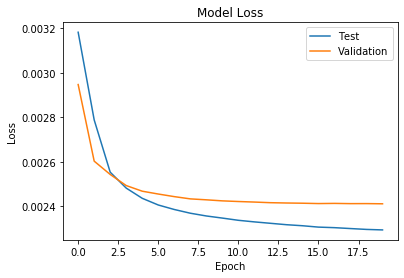

In [263]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [280]:
for i in range(3):
    faux = np.random.normal(1,900,(3,10)) * -1
    faux = faux.reshape(1,3,10)
    jamie = model.predict_on_batch(faux)
    for y in range(8):
        inverted = label_encoder.inverse_transform([argmax(jamie[0][y])])
        if(inverted == '9'):
            break
        print(inverted[0], end =" ")
    print('\n')

And I 

And I 

And I 

